# Part 1

## Exe. 1

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt


(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
print(training_data.shape)
print(training_targets.shape)
print(testing_data.shape)
print(testing_targets.shape)

(25000,)
(25000,)
(25000,)
(25000,)


## Exe. 2

The `training_data` is a matrix where each row is an observation. An observation conscists of a list of integers, each integer being linked to a specific word. Th integer represents the rank frequency of the word in all the reviews. For exemple the word linked to the integer 5 is the 5th most used word in all the reviews. This format is not well structured to be used in a neural network (two observations can have a different length). So we "vectorize" the observations by converting each observation $v_k$ into a binary vector of length 10000 where the $i^{th}$ index is set to 1 if $i \in v_k$

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(training_data)
x_test = vectorize_sequences(testing_data)
y_train = np.asarray(training_targets).astype('float32')
y_test = np.asarray(training_targets).astype('float32')

## Exe. 3

RMSProp (Root Mean Square Propagation) is an optimization technique which aims to solve the problem of **pathological curvature**.

### Pathological curvature

A pathological curvature can be seen as a "ravin" in the error graph. When we are on one of the sides of the ravin it's easy to see that the steepest curve is the one that lead to the bottom/center of the ravin. Such a configuration is a problem for stochastic gradient descent. Indeed if we choose a large learning rate the gradient descent algorithm will "zigzag" between the sides of the ravin, which may lead to a very slow convergence to the optimal. Conversely a small learning rate would lead us to the center of the ravin but will struggle to converge to the optimal afterward.

### Momentum

To prevent this problem we can use the **momentum** which is a very intuitive way to solve this problem. When updating the weight using the momentum technique we use the previously computed $\Delta w_{kj}^{n-1}$ in order to compute $\Delta w_{kj}^n$ thanks to the following formula:
$$
w_{kj}^n = (\eta \cdot \frac{\partial E}{\partial w_{kj}}) + (\alpha \cdot \Delta w^{n-1}_{kj})
$$

By adding a percentage of the previous $\Delta w_{kj}$ at each iteration the "zigzag" effect is soften. It's easy to see it when we imagine the sum of the vector $\Delta w_{kj}$ that a SGD gradient descent would produce in a pathological curvature.

### RMSProp

While in the momentum technique we corrected the updated weight by adding the previous delta, in the **RMSProp** technique we apply a modification **directly** to the learning rate. For each weight we will have a different learning rate. To do so we compute a running average of the previous gradients. For a given weight $w_{kj}$ the running average is noted $v(w_{kj}, n)$, where $n$ is the iteration number.
$$
v(w_{kj}, n) = \gamma \cdot v(w_{kj}, n-1) + (1 - \gamma) \cdot  \left(\frac{\partial E}{\partial w_{kj}}\right)^2
$$
$$
\Delta w_{kj} = -\frac{\eta}{\sqrt{v(w_{kj}, n) + \epsilon}} \cdot \left(\frac{\partial E}{\partial w_{kj}}\right)
$$

A good explaination of those optimizers can be found [here](https://blog.paperspace.com/intro-to-optimization-momentum-rmsprop-adam/) (with different notations)

In [ ]:
original_model = keras.Sequential([
    keras.layers.Dense(16, input_dim=10000, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])
rmsprop = keras.optimizers.RMSprop()
original_model.compile(
    optimizer=rmsprop,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## Exe. 4

In [ ]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, input_dim=10000, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
 ])
rmsprop = keras.optimizers.RMSprop()
smaller_model.compile(
     optimizer=rmsprop,
     loss='binary_crossentropy',
     metrics=['accuracy']
 )

## Exe. 5

In [ ]:
original_hist = original_model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20,
    validation_batch_size=512
)

Epoch 1/20
782/782 [==============================] - 4s 5ms/step - loss: 0.4044 - accuracy: 0.8258 - val_loss: 1.7886 - val_accuracy: 0.4989
Epoch 2/20
782/782 [==============================] - 3s 4ms/step - loss: 0.1990 - accuracy: 0.9280 - val_loss: 2.0363 - val_accuracy: 0.4966
Epoch 3/20
782/782 [==============================] - 3s 4ms/step - loss: 0.1653 - accuracy: 0.9387 - val_loss: 2.2134 - val_accuracy: 0.4982
Epoch 4/20
782/782 [==============================] - 3s 4ms/step - loss: 0.1492 - accuracy: 0.9464 - val_loss: 2.3325 - val_accuracy: 0.4994
Epoch 5/20
782/782 [==============================] - 3s 4ms/step - loss: 0.1278 - accuracy: 0.9553 - val_loss: 2.5327 - val_accuracy: 0.4997
Epoch 6/20
782/782 [==============================] - 3s 4ms/step - loss: 0.1174 - accuracy: 0.9593 - val_loss: 2.6991 - val_accuracy: 0.5002
Epoch 7/20
782/782 [==============================] - 3s 4ms/step - loss: 0.1046 - accuracy: 0.9638 - val_loss: 3.0263 - val_accuracy: 0.4997
Epoch 

## Exe. 6

In [ ]:
smaller_hist = smaller_model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20,
    validation_batch_size=512
)

Epoch 1/20
782/782 [==============================] - 4s 5ms/step - loss: 0.4270 - accuracy: 0.8192 - val_loss: 1.7233 - val_accuracy: 0.4988
Epoch 2/20
782/782 [==============================] - 3s 4ms/step - loss: 0.2059 - accuracy: 0.9232 - val_loss: 2.1316 - val_accuracy: 0.4988
Epoch 3/20
782/782 [==============================] - 3s 4ms/step - loss: 0.1770 - accuracy: 0.9321 - val_loss: 2.3045 - val_accuracy: 0.4999
Epoch 4/20
782/782 [==============================] - 3s 4ms/step - loss: 0.1605 - accuracy: 0.9420 - val_loss: 2.4265 - val_accuracy: 0.4989
Epoch 5/20
782/782 [==============================] - 3s 4ms/step - loss: 0.1439 - accuracy: 0.9478 - val_loss: 2.5759 - val_accuracy: 0.4997
Epoch 6/20
782/782 [==============================] - 3s 4ms/step - loss: 0.1394 - accuracy: 0.9512 - val_loss: 2.7324 - val_accuracy: 0.4992
Epoch 7/20
782/782 [==============================] - 3s 4ms/step - loss: 0.1306 - accuracy: 0.9555 - val_loss: 2.7039 - val_accuracy: 0.4998
Epoch 

## Exe. 7

In [ ]:
original_losses = original_hist.history['val_loss']
smaller_losses = smaller_hist.history['val_loss']

## Exe. 8

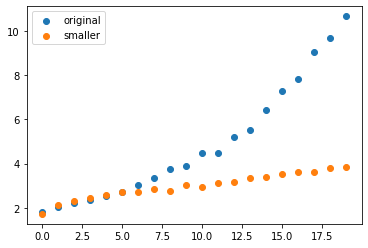

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(range(len(original_losses)), original_losses, label='original')
ax.scatter(range(len(smaller_losses)), smaller_losses, label='smaller')
plt.legend(loc='upper left')

We observe that the validation set loss seems to increase exponentially in the `original_model` after 8 epochs. 

## Exe. 9

In [ ]:
bigger_model = keras.Sequential([
    keras.layers.Dense(512, input_dim=10000, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
 ])
rmsprop = keras.optimizers.RMSprop()
bigger_model.compile(
     optimizer=rmsprop,
     loss='binary_crossentropy',
     metrics=['accuracy']
 )

## Exe. 10

In [ ]:
bigger_hist = bigger_model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20,
    validation_batch_size=512
)

Epoch 1/20
782/782 [==============================] - 5s 6ms/step - loss: 0.4025 - accuracy: 0.8254 - val_loss: 2.0135 - val_accuracy: 0.4975
Epoch 2/20
782/782 [==============================] - 4s 5ms/step - loss: 0.1946 - accuracy: 0.9304 - val_loss: 2.5531 - val_accuracy: 0.4993
Epoch 3/20
782/782 [==============================] - 4s 5ms/step - loss: 0.1422 - accuracy: 0.9527 - val_loss: 2.8879 - val_accuracy: 0.4988
Epoch 4/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0951 - accuracy: 0.9717 - val_loss: 5.9567 - val_accuracy: 0.5002
Epoch 5/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0616 - accuracy: 0.9840 - val_loss: 11.3371 - val_accuracy: 0.5001
Epoch 6/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0516 - accuracy: 0.9908 - val_loss: 18.2488 - val_accuracy: 0.4988
Epoch 7/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0330 - accuracy: 0.9935 - val_loss: 25.0977 - val_accuracy: 0.4976
Epo

## Exe. 11

In [ ]:
bigger_losses = bigger_hist.history['val_loss']

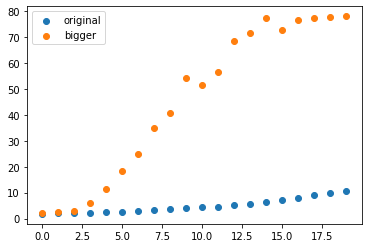

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(range(len(original_losses)), original_losses, label='original')
ax.scatter(range(len(bigger_losses)), bigger_losses, label='bigger')
plt.legend(loc='upper left')

## Exe. 12

In [ ]:
l2_model = keras.Sequential([
    keras.layers.Dense(16, input_dim=10000, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(1, activation='sigmoid'),
])
rmsprop = keras.optimizers.RMSprop()
l2_model.compile(
    optimizer=rmsprop,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## Exe. 13

In [ ]:
l2_hist = l2_model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20,
    validation_batch_size=512
)

Epoch 1/20
782/782 [==============================] - 4s 4ms/step - loss: 0.4358 - accuracy: 0.8304 - val_loss: 1.6496 - val_accuracy: 0.4968
Epoch 2/20
782/782 [==============================] - 3s 4ms/step - loss: 0.2957 - accuracy: 0.8939 - val_loss: 1.6145 - val_accuracy: 0.4992
Epoch 3/20
782/782 [==============================] - 3s 4ms/step - loss: 0.2822 - accuracy: 0.9028 - val_loss: 1.6219 - val_accuracy: 0.4996
Epoch 4/20
782/782 [==============================] - 3s 4ms/step - loss: 0.2758 - accuracy: 0.9102 - val_loss: 1.6724 - val_accuracy: 0.5005
Epoch 5/20
782/782 [==============================] - 3s 4ms/step - loss: 0.2729 - accuracy: 0.9094 - val_loss: 1.7352 - val_accuracy: 0.5006
Epoch 6/20
782/782 [==============================] - 3s 4ms/step - loss: 0.2655 - accuracy: 0.9114 - val_loss: 1.7035 - val_accuracy: 0.5002
Epoch 7/20
782/782 [==============================] - 3s 4ms/step - loss: 0.2522 - accuracy: 0.9160 - val_loss: 1.6037 - val_accuracy: 0.4996
Epoch 

## Exe. 14

In [ ]:
l2_losses = l2_hist.history['val_loss']

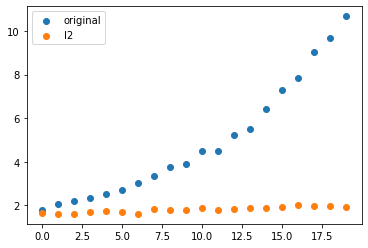

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(range(len(original_losses)), original_losses, label='original')
ax.scatter(range(len(l2_losses)), l2_losses, label='l2')
plt.legend(loc='upper left')

## Exe. 15

In [ ]:
dpt_model = keras.Sequential([
    keras.layers.Dense(16, input_dim=10000, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid'),
])
rmsprop = keras.optimizers.RMSprop()
dpt_model.compile(
    optimizer=rmsprop,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## Exe. 16

In [ ]:
dpt_hist = dpt_model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20,
    validation_batch_size=512
)

Epoch 1/20
782/782 [==============================] - 4s 5ms/step - loss: 0.5944 - accuracy: 0.6797 - val_loss: 1.4011 - val_accuracy: 0.4990
Epoch 2/20
782/782 [==============================] - 3s 4ms/step - loss: 0.4005 - accuracy: 0.8657 - val_loss: 1.6239 - val_accuracy: 0.4981
Epoch 3/20
782/782 [==============================] - 3s 4ms/step - loss: 0.3993 - accuracy: 0.8681 - val_loss: 1.6450 - val_accuracy: 0.4978
Epoch 4/20
782/782 [==============================] - 3s 4ms/step - loss: 0.4014 - accuracy: 0.8699 - val_loss: 1.6348 - val_accuracy: 0.4969
Epoch 5/20
782/782 [==============================] - 3s 4ms/step - loss: 0.3964 - accuracy: 0.8696 - val_loss: 1.7803 - val_accuracy: 0.4988
Epoch 6/20
782/782 [==============================] - 3s 4ms/step - loss: 0.3978 - accuracy: 0.8719 - val_loss: 1.6220 - val_accuracy: 0.4967
Epoch 7/20
782/782 [==============================] - 3s 4ms/step - loss: 0.3928 - accuracy: 0.8715 - val_loss: 1.7605 - val_accuracy: 0.4990
Epoch 

## Exe. 17

In [ ]:
dpt_losses = dpt_hist.history['val_loss']

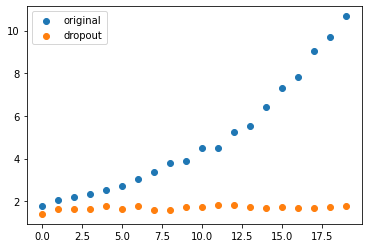

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(range(len(original_losses)), original_losses, label='original')
ax.scatter(range(len(dpt_losses)), dpt_losses, label='dropout')
plt.legend(loc='upper left')

We can see that the validation loss is almost constant when using dropout while it's growing when using the original model. This can be explained by the fact that dropout prevent the model to be too dependant of one weight by doping it out when training. This technique helps regularize our model.

# Part 2

## Exe. 1

In [ ]:
try:
    # %tensorflow_version  only  exists  in  Colab.
    %tensorflow_version  2.x
except  Exception:
    pass
from  keras.datasets  import  boston_housing

In [ ]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [ ]:
train_targets


array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [ ]:
test_targets

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])

## Exe. 2

In [ ]:
def normalize(data):
    stds = np.std(data, axis=0)
    means = np.mean(data, axis=0)
    for col_index in range(data.shape[1]):
        std = stds[col_index]
        mean = means[col_index]
        data[:, col_index] = (data[:, col_index] - mean) / std

In [ ]:
normalize(train_data)
normalize(test_data)

## Exe. 3

In [ ]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1),
    ])
    rmsprop = keras.optimizers.RMSprop()
    model.compile(
        optimizer=rmsprop,
        loss='mse',
        metrics=['mae']
    )
    return model

## Exe. 4

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in  range(k):
    print(f'processing  fold {i}')
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
                            [
                                train_data[:i * num_val_samples],
                                train_data[(i + 1) * num_val_samples :]
                            ],
                            axis=0)
    partial_train_targets = np.concatenate(
                            [
                                train_targets[:i * num_val_samples],
                                train_targets[(i + 1) * num_val_samples :]
                            ],
                            axis =0)
    model = build_model()
    model_hist = model.fit(
        partial_train_data, partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs,
        batch_size=1,
        verbose=0
    )
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing  fold 0
processing  fold 1
processing  fold 2
processing  fold 3


## Exe. 5

In [ ]:
print(f"MAE: {all_scores}")
print(f"mean MAE: {sum(all_scores) / len(all_scores)}")

MAE: [2.164391040802002, 2.860889434814453, 2.6176505088806152, 2.3791346549987793]
mean MAE: 2.5055164098739624


## Exe. 6

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_scores = []
val_mean_absolute_error = []
for i in  range(k):
    print(f'processing  fold {i}')
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
                            [
                                train_data[:i * num_val_samples],
                                train_data[(i + 1) * num_val_samples :]
                            ],
                            axis=0)
    partial_train_targets = np.concatenate(
                            [
                                train_targets[:i * num_val_samples],
                                train_targets[(i + 1) * num_val_samples :]
                            ],
                            axis =0)
    model = build_model()
    model_hist = model.fit(
        partial_train_data, partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs,
        batch_size=1,
        verbose=0
    )
    mae_history = model_hist.history['val_mae']
    val_mean_absolute_error.append(mae_history)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing  fold 0
processing  fold 1
processing  fold 2
processing  fold 3


## Exe. 7

In [ ]:
val_mae = []
for i in range(num_epochs):
    mean_mae = 0
    for j in range(len(val_mean_absolute_error)):
        mean_mae += val_mean_absolute_error[j][i]
    mean_mae /= len(val_mean_absolute_error)
    val_mae.append(mean_mae)

## Exe. 8

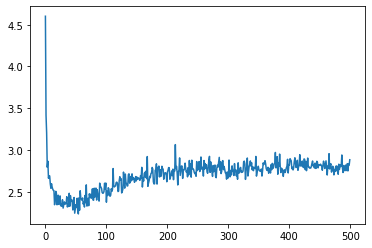

In [ ]:
plt.plot(range(num_epochs), val_mae)

## Exe. 9

In [ ]:
val_mae = val_mae[10:]
factor = 0.5
val_mae = [val_mae[0]] + [val_mae[i - 1] * factor + val_mae[i] * (1 - factor) for i in range(1, len(val_mae))]

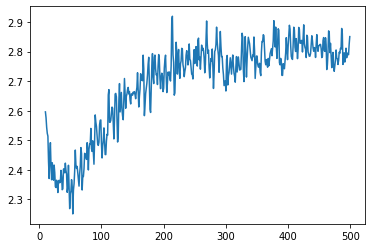

In [ ]:
plt.plot(range(10, num_epochs), val_mae)